In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
thetas = np.linspace(0, 1, 1001)
likelihood = lambda r: thetas if r else (1 - thetas)

In [5]:
def posterior(r, prior):
    lp = likelihood(r) * prior
    return lp / lp.sum()

In [6]:
p = np.array([1/len(thetas) for _ in thetas])
print(p)

[0.000999 0.000999 0.000999 ... 0.000999 0.000999 0.000999]


In [7]:
p = posterior(1, p)
print(p)

[0.00000000e+00 1.99800200e-06 3.99600400e-06 ... 1.99400599e-03
 1.99600400e-03 1.99800200e-03]


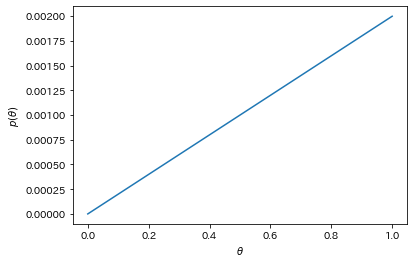

In [8]:
plt.plot(thetas, p)
plt.xlabel(r'$\theta$')
plt.ylabel(r'$p(\theta)$')
plt.show()

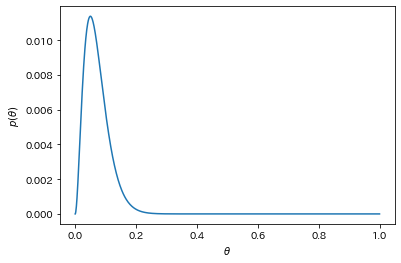

In [9]:
clicks = 2
noclicks = 38
p = np.array([1/len(thetas) for _ in thetas])
for _ in range(clicks):
    p = posterior(1, p)
for _ in range(noclicks):
    p = posterior(0, p)
    
plt.plot(thetas, p)
plt.xlabel(r'$\theta$')
plt.ylabel(r'$p(\theta)$')
plt.show()

In [15]:
def probablity(clicks, noclicks):
    p = np.array([1/len(thetas) for _ in thetas])
    for _ in range(clicks):
        p = posterior(1, p)
    for _ in range(noclicks):
        p = posterior(0, p)
    return p

In [16]:
alice_A = probablity(clicks=2, noclicks=38)
alice_B = probablity(clicks=4, noclicks=46)
bob_A = probablity(clicks=64, noclicks=1216)
bob_B = probablity(clicks=128, noclicks=1472)


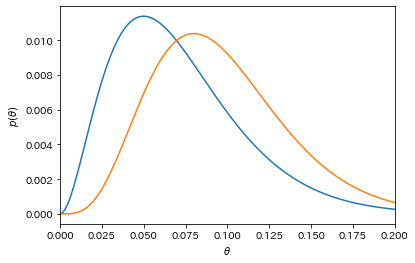

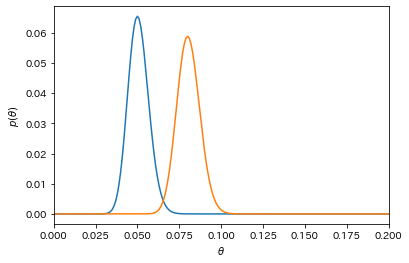

In [19]:
fig = plt.figure()
plt.plot(thetas, alice_A)
plt.plot(thetas, alice_B)
plt.xlabel(r'$\theta$')
plt.ylabel(r'$p(\theta)$')
plt.xlim(0, 0.2)
plt.show()

fig = plt.figure()
plt.plot(thetas, bob_A)
plt.plot(thetas, bob_B)
plt.xlabel(r'$\theta$')
plt.ylabel(r'$p(\theta)$')
plt.xlim(0, 0.2)
plt.show()

In [20]:
likelihood = lambda a, N: thetas  ** a * (1 - thetas) ** (N - a)

def posterior(a, N, prior):
    lp = likelihood(a, N) * prior
    return lp / lp.sum()


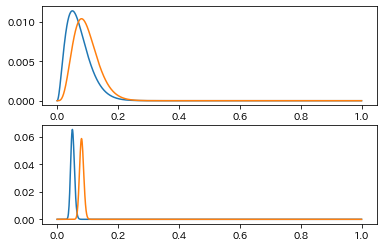

In [21]:
prior = 1 / len(thetas)
plt.subplot(2, 1, 1)
plt.plot(thetas, posterior(2, 40, prior), label='Alice - A')
plt.plot(thetas, posterior(4, 50, prior), label='Alice - B')

plt.subplot(2, 1, 2)
plt.plot(thetas, posterior(64, 1280, prior), label='Bob - A')
plt.plot(thetas, posterior(128, 1600, prior), label='Bob - B')
plt.show()

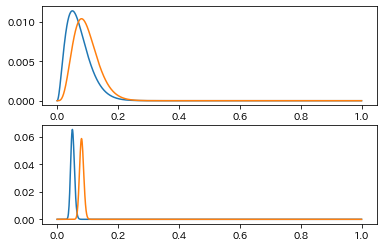

In [23]:
def betaf(alpha, beta):
    numerator = thetas ** (alpha - 1) * (1 - thetas) ** (beta - 1)
    return numerator / numerator.sum()

def posterior(a, N):
    return betaf(a + 1, N - a + 1)

prior = 1 / len(thetas)
plt.subplot(2, 1, 1)
plt.plot(thetas, posterior(2, 40), label='Alice - A')
plt.plot(thetas, posterior(4, 50), label='Alice - B')

plt.subplot(2, 1, 2)
plt.plot(thetas, posterior(64, 1280), label='Bob - A')
plt.plot(thetas, posterior(128, 1600), label='Bob - B')
plt.show()

In [29]:
def hmv(xs, ps, alpha=0.95):
    xps = sorted(zip(xs, ps), key=lambda xp: xp[1], reverse=True)
    xps = np.array(xps)
    xs = xps[:, 0]
    ps = xps[:, 1]
    return np.sort(xs[np.cumsum(ps) <= alpha])

In [26]:
thetas = np.linspace(0, 1, 1001)

def posterior(a, N):
    alpha = a + 1
    beta = N - a + 1
    numerator = thetas ** (alpha - 1) * (1- thetas) ** (beta - 1)
    return numerator / numerator.sum()
ps = posterior(2, 40)

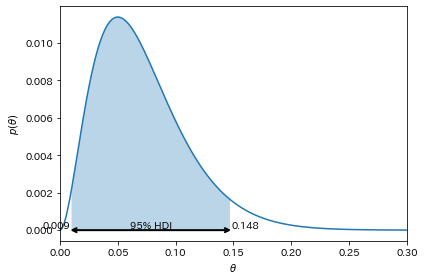

In [40]:
hm_thetas = hmv(thetas, ps, alpha=0.95)
plt.plot(thetas, ps)
plt.annotate('', xy=(hm_thetas.min(), 0), xytext=(hm_thetas.max(), 0),
                                                                        arrowprops=dict(color='black', shrinkA=0, shrinkB=0, arrowstyle='<->', linewidth=2))
plt.annotate('%.3f' % hm_thetas.min(), xy=(hm_thetas.min(), 0), ha='right', va='bottom')
plt.annotate('%.3f' % hm_thetas.max(), xy=(hm_thetas.max(), 0), ha='left', va='bottom')
plt.annotate('95% HDI' , xy=(hm_thetas.mean(), 0), ha='center', va='bottom')
hm_region = (hm_thetas.min() < thetas) & (thetas < hm_thetas.max())
plt.fill_between(thetas[hm_region], ps[hm_region], 0, alpha=0.3)
plt.xlim(0, 0.3)
plt.xlabel(r'$\theta$')
plt.ylabel(r'$p(\theta)$')
plt.tight_layout()
plt.show()

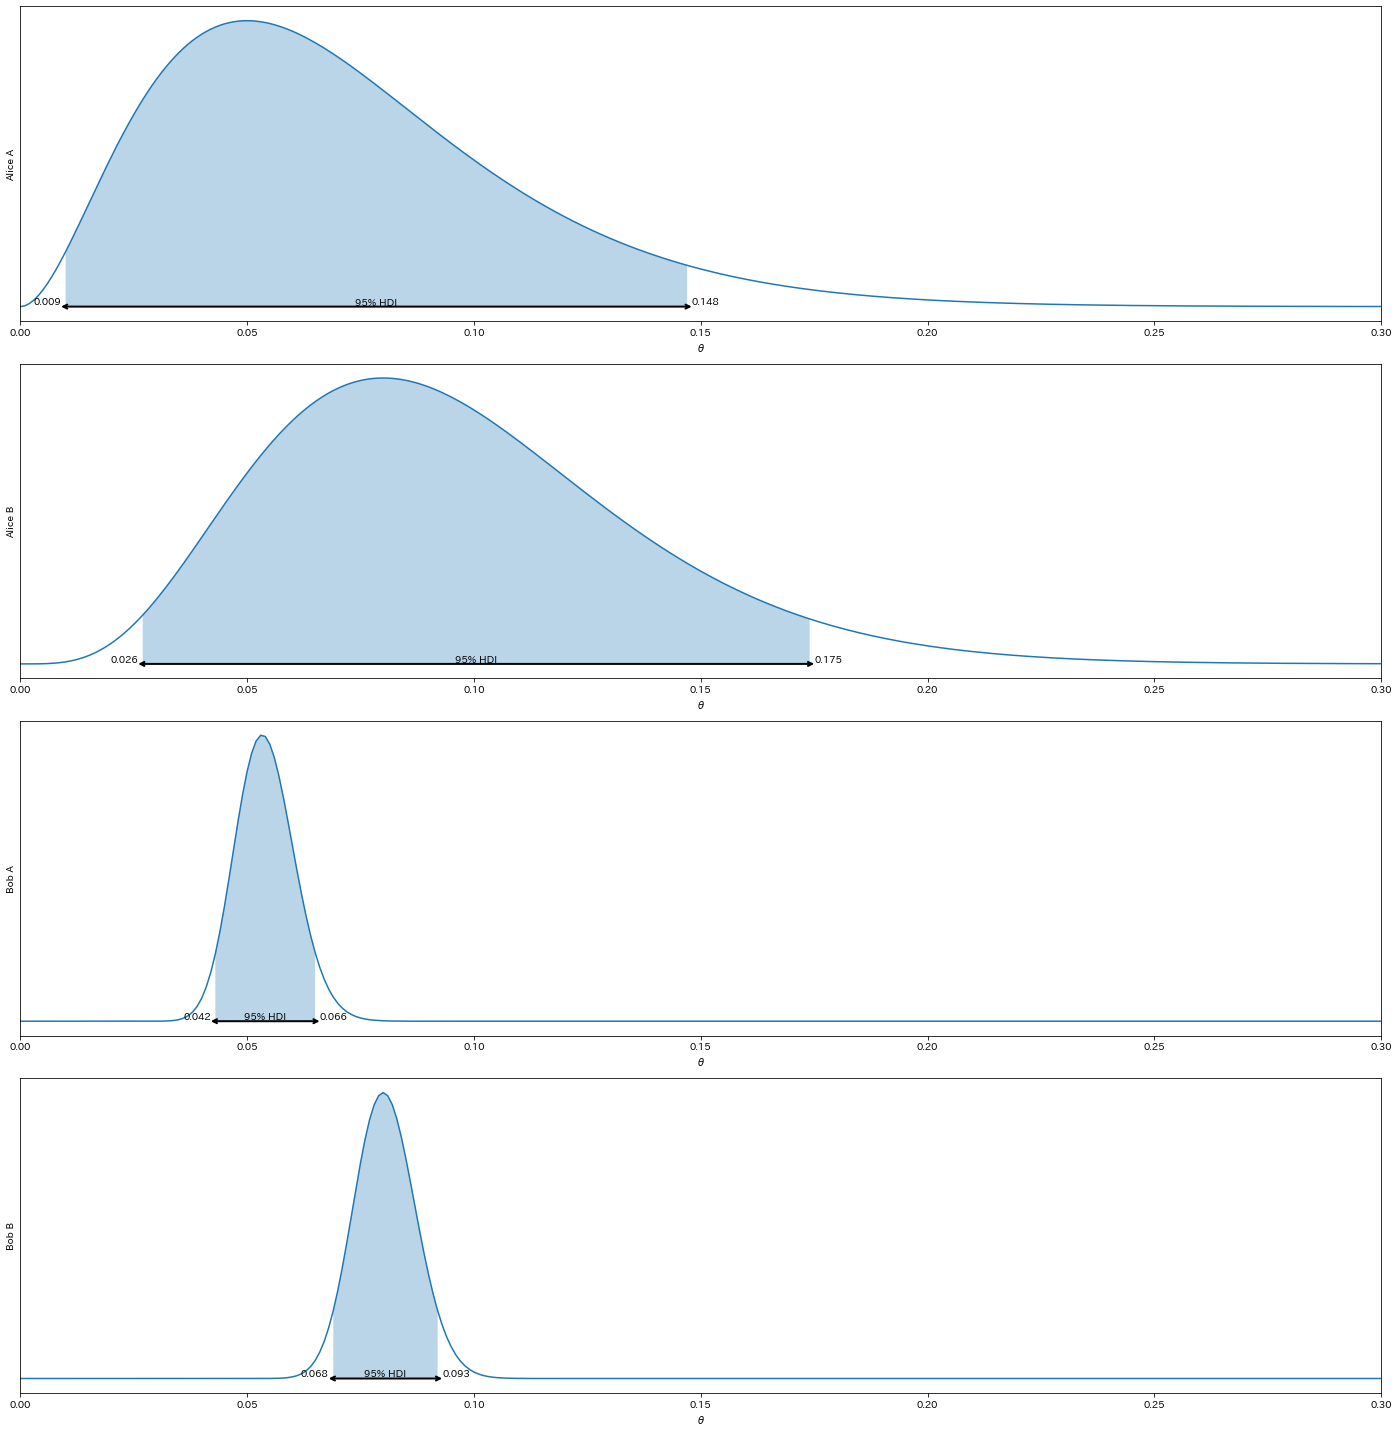

In [47]:
def plot_hdi(ps, label):
    

    hm_thetas = hmv(thetas, ps, alpha=0.95)
    plt.plot(thetas, ps)
    plt.annotate('', xy=(hm_thetas.min(), 0), xytext=(hm_thetas.max(), 0),
                                                                            arrowprops=dict(color='black', shrinkA=0, shrinkB=0, arrowstyle='<->', linewidth=2))
    plt.annotate('%.3f' % hm_thetas.min(), xy=(hm_thetas.min(), 0), ha='right', va='bottom')
    plt.annotate('%.3f' % hm_thetas.max(), xy=(hm_thetas.max(), 0), ha='left', va='bottom')
    plt.annotate('95% HDI' , xy=(hm_thetas.mean(), 0), ha='center', va='bottom')
    hm_region = (hm_thetas.min() < thetas) & (thetas < hm_thetas.max())
    plt.fill_between(thetas[hm_region], ps[hm_region], 0, alpha=0.3)
    plt.xlim(0, 0.3)
    plt.xlabel(r'$\theta$')
    plt.ylabel(r'$p(\theta)$')
    plt.tight_layout()
    plt.ylabel(label)
    plt.yticks([])

fig = plt.figure(figsize=(20, 20))
plt.subplot(4, 1, 1)
alice_a = posterior(2, 40)
plot_hdi(alice_a, 'Alice A')

plt.subplot(4, 1, 2)
alice_b = posterior(4, 50)
plot_hdi(alice_b, 'Alice B')

plt.subplot(4, 1, 3)
bob_a = posterior(64, 1200)
plot_hdi(bob_a, 'Bob A')


plt.subplot(4, 1, 4)
bob_b = posterior(128, 1600)
plot_hdi(bob_b, 'Bob B')

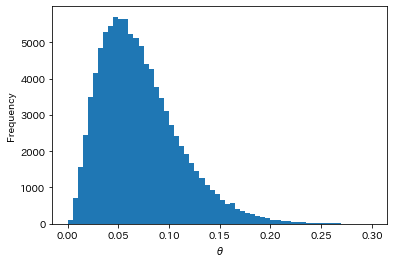

In [50]:
data = np.random.beta(3, 39, size=100000)
plt.hist(data, range=(0, 0.3), bins=60)
plt.xlabel(r'$\theta$')
plt.ylabel('Frequency')
plt.show()

In [ ]:
theta_a = np.random.beta(3, 39, size=100000)
theta_b = np.random.beta(5, 47, size=100000)
delta = theta_b - theta_a
plt.hist(del)